## Project 10: Fraud Check Prediction.

Objective: Prediction of the fraud check.


In [1]:
## importing Libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [94]:
data=pd.read_csv('D:/Data Science/TOPMENTOR-DS/Machine Learning/Random Forests-Project-9&10/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [95]:
# make a copy of data'
df=data.copy()

In [96]:
df.shape

(600, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [20]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

There are no null values in the dataset

In [7]:
df.duplicated().sum()

0

There are no duplicate rows in the data

### Exploratory data analysis

In [8]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [97]:
# changing the Taxable income to categorical one 
#taxable_income <= 30000 as "Risky" and others are "Good".
df['Tax_criteria']=df['Taxable.Income'].map(lambda x: "Risky" if x<=30000 else "Good")

In [98]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_criteria
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [99]:
# to check the categorical columns
cat_col=df.select_dtypes(np.object_)

In [100]:
cat_col.head()

,Undergrad,Marital.Status,Urban,Tax_criteria
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good


In [101]:
# to check the numerical columns
num_col=df.select_dtypes(np.number)
num_col.head()

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28


In [23]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_criteria
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [62]:
df['Tax_criteria'].value_counts()

Good     476
Risky    124
Name: Tax_criteria, dtype: int64

1. Number of people with good status are 476 
2. Number of people with risk status are 124

In [87]:
df.groupby(['Undergrad','Tax_criteria']).size()

Undergrad  Tax_criteria
NO         Good            230
           Risky            58
YES        Good            246
           Risky            66
dtype: int64

1. This does not give any specific information.
2. The count of good and risky status is almost same for people with/not with undergrad background

In [84]:
df.groupby(['Marital.Status','Tax_criteria']).size()

Marital.Status  Tax_criteria
Divorced        Good            153
                Risky            36
Married         Good            149
                Risky            45
Single          Good            174
                Risky            43
dtype: int64

1. There are large number of Single individuals who have good status, followed by divorced and married.
2. There are large number of married individuals who have risk status, followed by single and divorced.

In [85]:
df.groupby(['Urban','Tax_criteria']).size()

Urban  Tax_criteria
NO     Good            237
       Risky            61
YES    Good            239
       Risky            63
dtype: int64

1. This does not give any specific information.
2. The count of good and risky status is almost same for people from/not from urban area

Text(0.5, 1.0, 'count of Tax criteria')

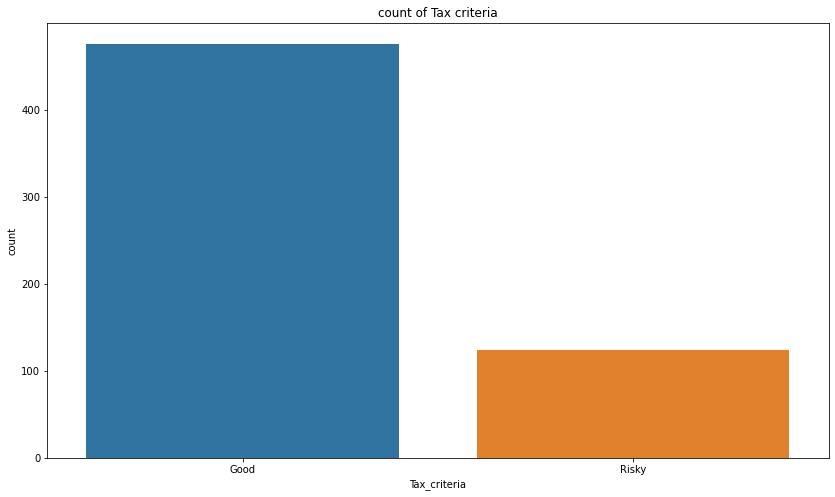

In [93]:
# marital status wise Tax criteria 
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Tax_criteria')
plt.savefig('Tax criteria count.jpg',bbox_inches='tight',dpi=200)
plt.title('count of Tax criteria')

Text(0.5, 1.0, 'Undergrad wise Tax criteria')

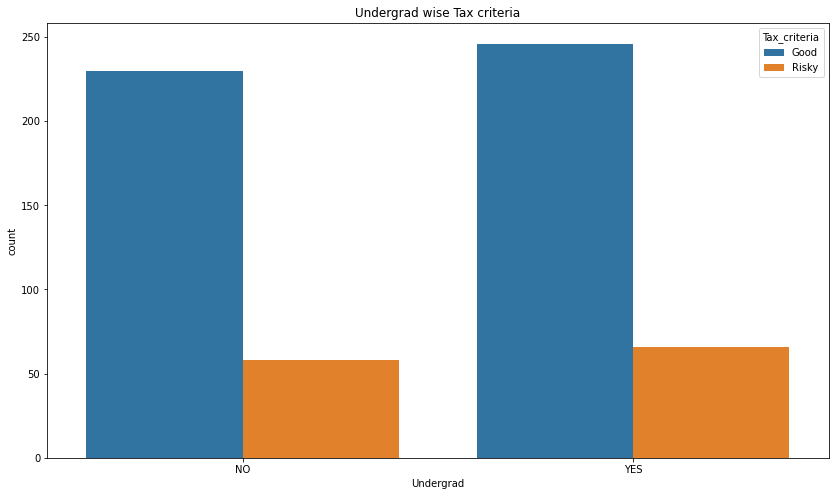

In [90]:
# Undergrad wise Tax criteria 
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Undergrad',hue='Tax_criteria')
plt.savefig('Undergrad wise Tax criteria.jpg',bbox_inches='tight',dpi=200)
plt.title('Undergrad wise Tax criteria')

Text(0.5, 1.0, 'marital status wise Tax criteria')

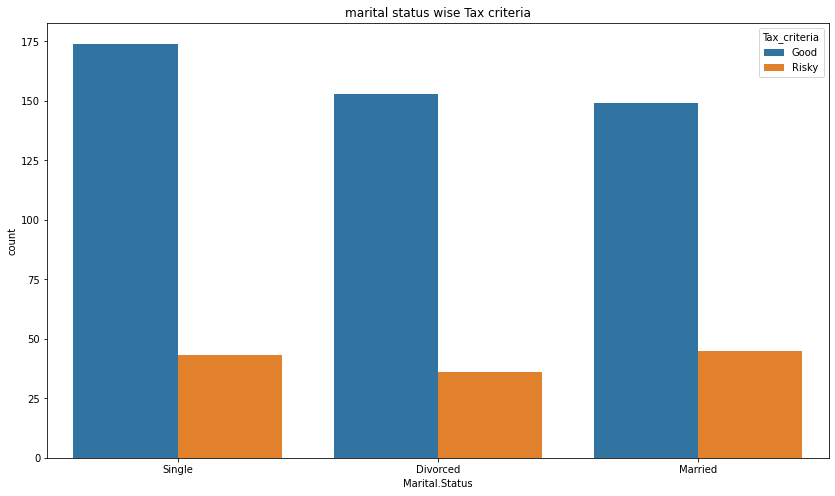

In [91]:
# marital status wise Tax criteria 
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Marital.Status',hue='Tax_criteria')
plt.savefig('marital status wise Tax criteria.jpg',bbox_inches='tight',dpi=200)
plt.title('marital status wise Tax criteria')

Text(0.5, 1.0, 'Urban wise Tax criteria')

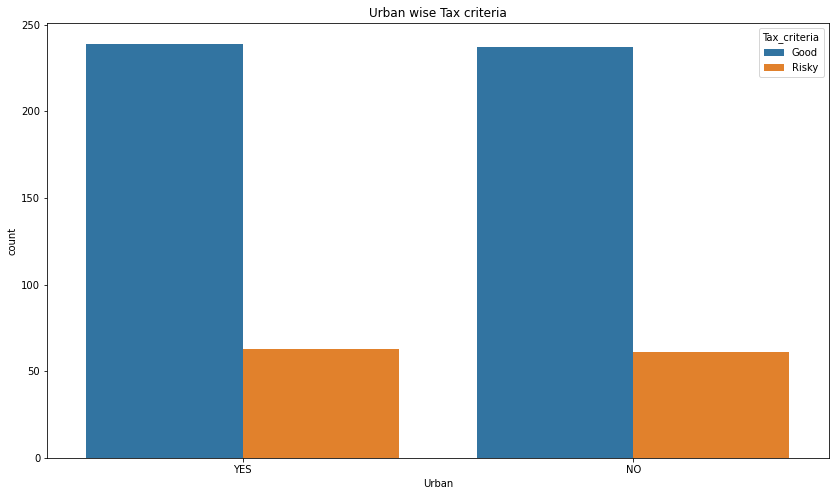

In [92]:
# Urban wise Tax criteria 
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Urban',hue='Tax_criteria')
plt.savefig('Urban wise Tax criteria.jpg',bbox_inches='tight',dpi=200)
plt.title('Urban wise Tax criteria')

C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


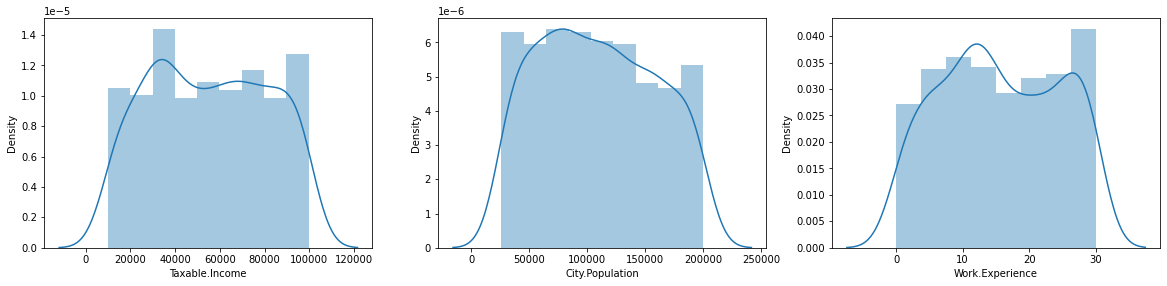

In [141]:
# A univariate distrubution of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.savefig('distribution of features.jpg',bbox_inches='tight',dpi=200)
plt.show()

The data in all the features is normally distributed.

In [16]:
round(df.skew(),2)
#df.skew()

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\2066448341.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(df.skew(),2)


Taxable.Income     0.03
City.Population    0.13
Work.Experience    0.02
dtype: float64

C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\2398566499.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('distribution of features.jpg',bb_box='Tight',dpi=200)


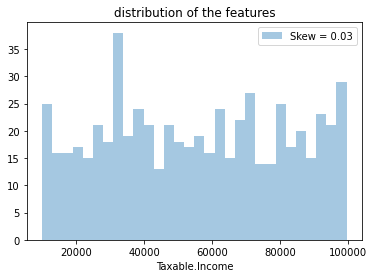

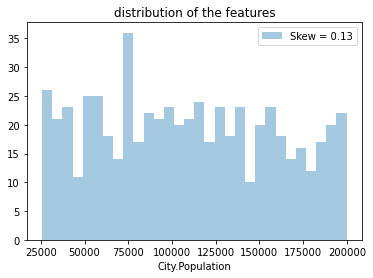

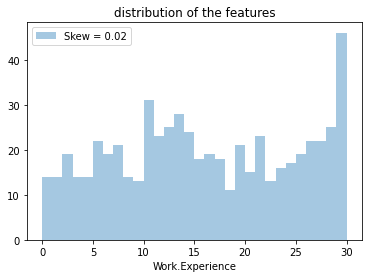

In [140]:
# -----------------OR----------------
for col in num_col:
    skew = df[col].skew()
    sns.distplot(df[col], kde= False, label='Skew = %.2f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.title('distribution of the features')
    plt.savefig('distribution of features.jpg',bb_box='Tight',dpi=200)
    plt.show()

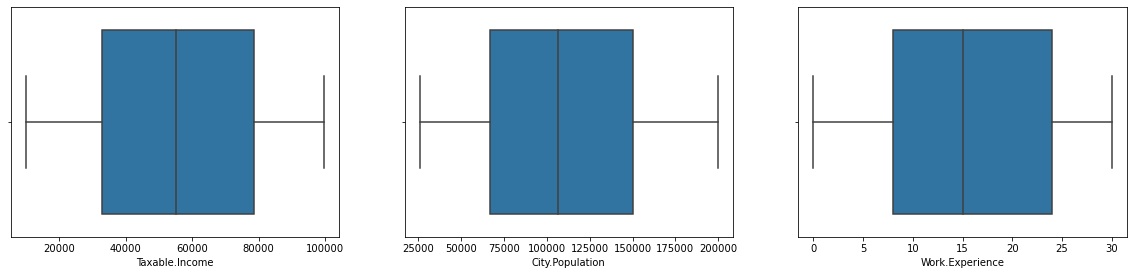

In [139]:
# A univariate boxplot of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.savefig('boxplot of features with outliers.jpg')
plt.show()

There are no outliers in the dataset.

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\1606195808.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('boxplot of features.jpg',bb_box='Tight',dpi=200)


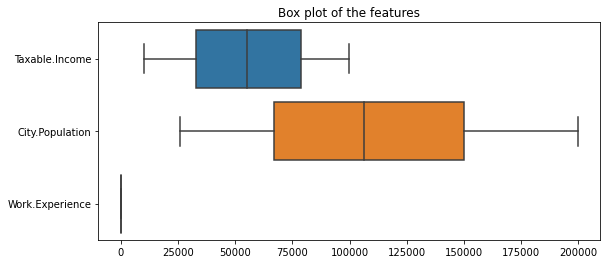

In [114]:
# ------or------
# Box plot to check the presence of outliers
plt.figure(figsize=(9,4))
sns.boxplot(data= num_col, orient="h")
plt.title('Box plot of the features')
plt.savefig('boxplot of features.jpg',bb_box='Tight',dpi=200)
plt.show()

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\1247397005.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('pairplot of features.jpg',bb_box='Tight',dpi=200)


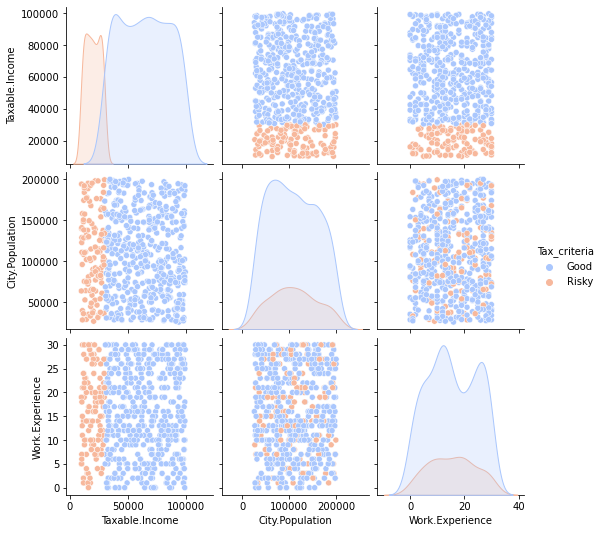

In [138]:
sns.pairplot(data=df,hue='Tax_criteria', palette='coolwarm')
plt.savefig('pairplot of features.jpg',bb_box='Tight',dpi=200)
plt.show()

In [104]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_criteria'],
      dtype='object')

In [119]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


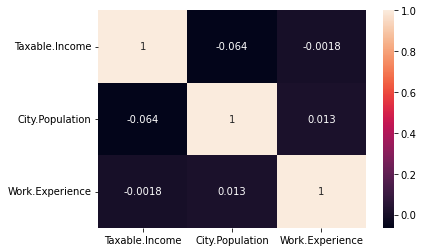

In [120]:
sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\2337621900.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('pie chart of Tax criteria.png',bb_box='Tight',dpi=200)


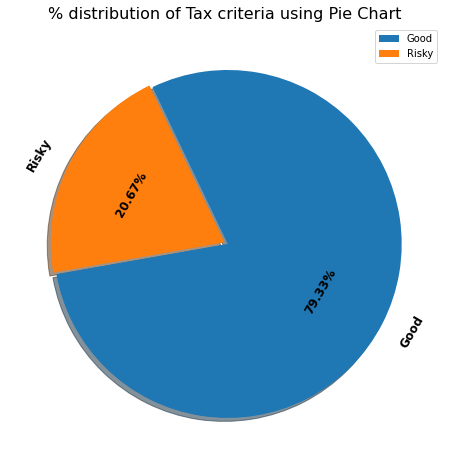

In [137]:
plt.figure(figsize = (9,8))
plt.pie(df['Tax_criteria'].value_counts(), labels= df['Tax_criteria'].unique(),
       explode = [0.02,0.0], autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large', 'fontweight':'bold', 'rotation': 60, 'color':'black'})
plt.legend(loc= 'upper right')
plt.title("% distribution of Tax criteria using Pie Chart", fontsize = 16)
plt.savefig('pie chart of Tax criteria.png',bb_box='Tight',dpi=200)
plt.show()

In [32]:
cat_col.head()

,Undergrad,Marital.Status,Urban,Tax_criteria
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good


In [33]:
# let's convert bool value features like undergrad and Urban into numeric one
cat_col['Urban'] = cat_col['Urban'].replace(to_replace={'YES':1, 'NO':0})
cat_col['Undergrad'] = cat_col['Undergrad'].replace(to_replace={'YES':1, 'NO':0})


In [34]:
# OHE FOR ShelveLOc feature
dum=pd.get_dummies(cat_col['Marital.Status'])

In [35]:
df1=pd.concat([dum,cat_col],axis=1)

In [36]:
df1.head()

,Divorced,Married,Single,Undergrad,Marital.Status,Urban,Tax_criteria
0,0,0,1,0,Single,1,Good
1,1,0,0,1,Divorced,1,Good
2,0,1,0,0,Married,1,Good
3,0,0,1,1,Single,1,Good
4,0,1,0,0,Married,0,Good


In [37]:
df1.drop('Marital.Status',axis=1,inplace=True)

In [38]:
df1.head()

,Divorced,Married,Single,Undergrad,Urban,Tax_criteria
0,0,0,1,0,1,Good
1,1,0,0,1,1,Good
2,0,1,0,0,1,Good
3,0,0,1,1,1,Good
4,0,1,0,0,0,Good


In [39]:
df2=pd.concat([num_col,df1],axis=1)

In [40]:
df2.head()

,Taxable.Income,City.Population,Work.Experience,Divorced,Married,Single,Undergrad,Urban,Tax_criteria
0,68833,50047,10,0,0,1,0,1,Good
1,33700,134075,18,1,0,0,1,1,Good
2,36925,160205,30,0,1,0,0,1,Good
3,50190,193264,15,0,0,1,1,1,Good
4,81002,27533,28,0,1,0,0,0,Good


In [41]:
df2.drop('Taxable.Income',axis=1,inplace=True)

In [42]:
df2.head()

,City.Population,Work.Experience,Divorced,Married,Single,Undergrad,Urban,Tax_criteria
0,50047,10,0,0,1,0,1,Good
1,134075,18,1,0,0,1,1,Good
2,160205,30,0,1,0,0,1,Good
3,193264,15,0,0,1,1,1,Good
4,27533,28,0,1,0,0,0,Good


### Sampling the data

In [46]:
x=df2.iloc[:,:7]
y=df2.iloc[:,-1:]


In [47]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
x_sc=sc.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)

In [51]:
x_train.shape,x_test.shape

((480, 7), (120, 7))

### Model Building

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model_rf=RandomForestClassifier(criterion='gini', max_depth=5,random_state=1)

In [68]:
model_rf_fit=model_rf.fit(x_train,y_train)

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_5860\3931986453.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_fit=model_rf.fit(x_train,y_train)


In [69]:
pred=model_rf_fit.predict(x_test)

In [70]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [71]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['actual']=y_test.values

In [72]:
dd.head()

,predicted,actual
0,Good,Risky
1,Good,Good
2,Good,Risky
3,Good,Good
4,Good,Good


### Model Dynamics

In [73]:
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

In [129]:
print('Model: Random Forest')

print('The accuracy of the model is:',round(accuracy_score(dd['actual'],dd['predicted']),2))
#print('The precision of the model is:',round(precision_score(dd['actual'],dd['predicted']),2))
print('The confusion matrix is :',confusion_matrix(dd['actual'],dd['predicted']))
print('The classification report is :\n',classification_report(dd['actual'],dd['predicted']))

Model: Random Forest
The accuracy of the model is: 0.81
The confusion matrix is : [[97  0]
 [23  0]]
The classification report is :
               precision    recall  f1-score   support

        Good       0.81      1.00      0.89        97
       Risky       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

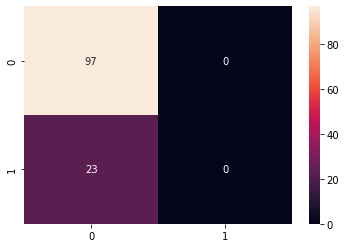

In [77]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

### Saving the model

In [130]:
import joblib

In [133]:
filename='fraud_check_prj_10.sav'

In [134]:
joblib.dump(model_rf_fit,filename)

['fraud_check_prj_10.sav']